# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

sns.set()

### Loading Data

In [2]:
dataset = pd.read_csv("FuelConsumption.csv")
data = dataset.copy()
data

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


## Checking for Null Values

In [3]:
data.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

## Defining Predicted Variable "y" and Predictor Variables "x"

In [4]:
y = data["CO2EMISSIONS"].values.reshape(-1, 1)
y

array([[196],
       [221],
       [136],
       ...,
       [271],
       [260],
       [294]], dtype=int64)

In [5]:
# data.drop("CO2EMISSIONS", axis=1) # Test
x = data.drop("CO2EMISSIONS", axis=1)
x

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27
...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25


# Exploratory Data Analysis

### Plots

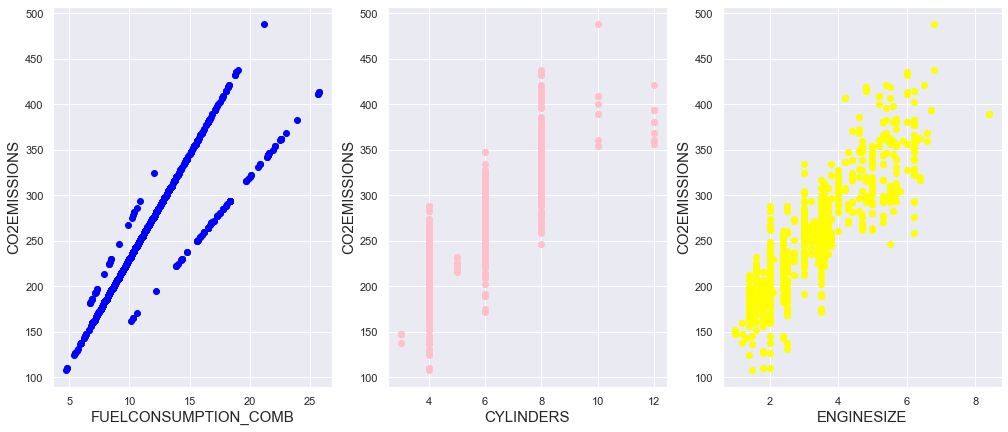

In [6]:
# Scatter plot of CO2EMISSIONS and CYLINDERS

plt.figure(figsize=(17, 7))
plt.subplot(131)
plt.scatter(x["FUELCONSUMPTION_COMB"], y, c='blue')
plt.xlabel("FUELCONSUMPTION_COMB", fontsize=15)
plt.ylabel("CO2EMISSIONS", fontsize=15)


plt.subplot(132)
plt.scatter(x["CYLINDERS"], y, c='pink')
plt.xlabel("CYLINDERS", fontsize=15)
plt.ylabel("CO2EMISSIONS", fontsize=15)

plt.subplot(133)
plt.scatter(x["ENGINESIZE"], y, c='yellow')
plt.xlabel("ENGINESIZE", fontsize=15)
plt.ylabel("CO2EMISSIONS", fontsize=15)


plt.show()

From the plots, there's a clear positive correlation between **(FUELCONSUMPTION_COMB, ENGINESIZE)** and **CO2EMISSIONS**.

**CYLINDERS** might not be a really good predictor variable, but a feature analysis would better determine if it is or not

## Training Linear Multiple regressions

In [7]:
X = x[["FUELCONSUMPTION_COMB", "ENGINESIZE", "CYLINDERS"]]
X

,FUELCONSUMPTION_COMB,ENGINESIZE,CYLINDERS
0,8.5,2.0,4
1,9.6,2.4,4
2,5.9,1.5,4
3,11.1,3.5,6
4,10.6,3.5,6
...,...,...,...
1062,11.8,3.0,6
1063,11.5,3.2,6
1064,11.8,3.0,6
1065,11.3,3.2,6


In [8]:
# Training observed data with test size of 1/3 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Fitting the Regression Model

In [9]:
reg = LinearRegression()

In [10]:
reg.fit(X_train, y_train)

LinearRegression()

In [11]:
reg.coef_

array([[ 9.62819466, 10.81182285,  7.91211618]])

In [12]:
predictors = pd.DataFrame(data=["FUELCONSUMPTION_COMB", "ENGINESIZE", "CYLINDERS"], columns=["Predictors"])
predictors

,Predictors
0,FUELCONSUMPTION_COMB
1,ENGINESIZE
2,CYLINDERS


In [13]:
coefficients = reg.coef_
coefficients

array([[ 9.62819466, 10.81182285,  7.91211618]])

### Coefficients associated with each predictor

In [14]:
# predictors["Coefficients"] = reg.coefficients.reshape(-1, 1)

predictors["Coefficients"] = reg.coef_.reshape(-1, 1)
predictors

,Predictors,Coefficients
0,FUELCONSUMPTION_COMB,9.628195
1,ENGINESIZE,10.811823
2,CYLINDERS,7.912116


#### Model Accuracy as compared with that of only **FUELCONSUMPTION_COMB**

In [15]:
y_pred = reg.predict(X_test)
print("R-Squared:", reg.score(X_test,y_test))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

R-Squared: 0.8425233378938857
Residual sum of squares (RSS): 219936.91
Mean absolute error (MAE): 18.05
Mean square error (MSE): 617.80
Root mean square error (RMSE): 24.86


The Accuracy(R<sup>2</sup>) of this multiple linear regression (*0.8425233378938857*) is greater than that of only **FUELCONSUMPTION_COMB**(*0.7323694811043888*)

This can be deduced as, the added values for the **Linearregression model**, increases the **fittness** of the model with the observed data 

Correlation between **FUELCONSUMPTION_CITY**, **FUELCONSUMPTION_HWY**, and **FUELCONSUMPTION_COMB**

In [16]:
trio_data = x[["FUELCONSUMPTION_COMB","FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]]
corr = trio_data.corr()
corr

,FUELCONSUMPTION_COMB,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
FUELCONSUMPTION_COMB,1.000000,0.995542,0.985804
FUELCONSUMPTION_CITY,0.995542,1.000000,0.965718
FUELCONSUMPTION_HWY,0.985804,0.965718,1.000000


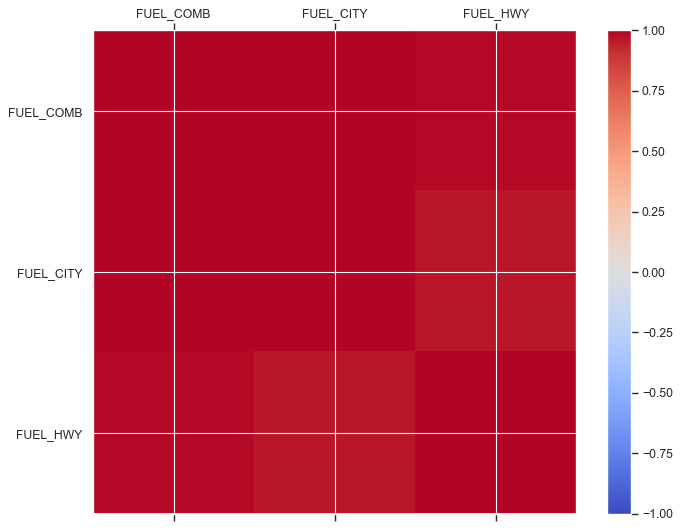

In [17]:
fig = plt.figure(figsize=(10,8), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(corr, cmap = plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = dataset.columns
ax.set_xticklabels(["FUEL_COMB","FUEL_CITY", "FUEL_HWY"])
ax.set_yticklabels(["FUEL_COMB","FUEL_CITY", "FUEL_HWY"])
plt.show()

The three features are strongly correlated to each other but the correlation between **"FUELCONSUMPTION_CITY"** and **"FUELCONSUMPTION_HWY"**, is a bit less than between their correlation with **"FUELCONSUMPTION_COMB"** 

#### Adding **'FUELCONSUMPTION_CITY'** and **'FUELCONSUMPTION_HWY'** to previous regression model

In [18]:
new_X = x[["FUELCONSUMPTION_COMB", "ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]]
new_X

,FUELCONSUMPTION_COMB,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
0,8.5,2.0,4,9.9,6.7
1,9.6,2.4,4,11.2,7.7
2,5.9,1.5,4,6.0,5.8
3,11.1,3.5,6,12.7,9.1
4,10.6,3.5,6,12.1,8.7
...,...,...,...,...,...
1062,11.8,3.0,6,13.4,9.8
1063,11.5,3.2,6,13.2,9.5
1064,11.8,3.0,6,13.4,9.8
1065,11.3,3.2,6,12.9,9.3


In [19]:
# Training the model with the added xi variables

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 1/3, random_state = 0)

In [20]:
# Fitting the trained Model

new_reg = LinearRegression()
new_reg.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = new_reg.predict(X_test)
print("R-Squared:", new_reg.score(X_test,y_test))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

R-Squared: 0.8426468641660052
Residual sum of squares (RSS): 219764.39
Mean absolute error (MAE): 18.02
Mean square error (MSE): 617.32
Root mean square error (RMSE): 24.85


The Accuracy(R<sup>2</sup>) of this new multiple linear regression (*0.8426468641660052*) is slightly greater than that of the previous multiple linear regression (*0.7323694811043888*).

This slight gain in model acuracy can be interpreted as:
    - A possible overfit
    - It has just a small effect on the model accuracy

In [22]:
print("Variance-score: %.2f" % r2_score(y_test , y_pred) )

Variance-score: 0.84


## Using statsmodel to get a statistical summary of our regression models


#### Statistical summary for the simple Linear regression model X = data["FUELCONSUMPTION_COMB", "ENGINESIZE", "CYLINDERS"]


In [23]:
X_sm = sm.add_constant(X)
regression = sm.OLS(y, X_sm).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     2251.
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:32:20   Log-Likelihood:                -4876.1
No. Observations:                1067   AIC:                             9760.
Df Residuals:                    1063   BIC:                             9780.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   65.2233 

**F-statistic:** The test for the overall significance of a model

**R-squared:** This measures how well a Regression Model fits the observed Data

**Adj. R-squared:** This is a modified version of the *R-squared* that adjuts for additional predictors that are not significant in a Regression Model

    **F-statistique:** Le test pour la signification globale d'un modèle.

    **R-carré:** Il mesure la qualité de l'ajustement d'un modèle de régression aux données observées.

    **R-carré ajusté:** Il s'agit d'une version modifiée du R-carré qui tient compte des prédicteurs  supplémentaires qui ne sont pas significatifs dans un modèle de régression.

**p-values**

The p-values of *xi* ('FUELCONSUMPTION_COMB', 'ENGINESIZE', and 'CYLINDERS')  are less than **0.05** (p-value < 0.05)

This implies the *xi* are statistically significant in the regression model and thus indicates that we can reject the null hypothesis

**R-squared:  0.864**

The R-squared: 0.864 indicates that the Regression model fits the observed Data at 86%. This therefore means that the regression is highly accurate at about 86%

**Adj. R-squared: 0.864**

The Adj. R-squared of 0.864 which is **≈** R-squared: 0.864,  indicates that our *xi* variables used in the regression model are statistically significant

**F-statistic:**

The F-statistic:  2251 indicates the Regression model is statistically significant.

**_*NB_** The lower the F-statistic of a model, the closer to a non-statistical significance of the model

## Including Non-Numeric Values in Regression Model

In [24]:
features = ['MODELYEAR', 'ENGINESIZE', 'CYLINDERS', 'FUELTYPE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG']

Only **FUELTYPE** will be used as an *xi* variable to be included in a new Regression Model

In [25]:
# Getting the number of occurances for each Unique value of 'FUELTYPE'

x["FUELTYPE"].value_counts()

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

In [26]:
# Transforming the nonnumeric values of "FUELTYPE" by mapping the individual values to integers

# x["FUELTYPE"].map({"X":1, "Z": 2, "E": 3, "D": 4}) # Test
x["FUELTYPE"] = x["FUELTYPE"].map({"X":1, "Z": 2, "E": 3, "D": 4})
x["FUELTYPE"]

0       2
1       2
2       2
3       2
4       2
       ..
1062    1
1063    1
1064    1
1065    1
1066    1
Name: FUELTYPE, Length: 1067, dtype: int64

In [27]:
x["FUELTYPE"].value_counts()

1    514
2    434
3     92
4     27
Name: FUELTYPE, dtype: int64

In [28]:
non_num_X = x[["FUELCONSUMPTION_COMB", "ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELTYPE"]]
non_num_X

,FUELCONSUMPTION_COMB,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELTYPE
0,8.5,2.0,4,9.9,6.7,2
1,9.6,2.4,4,11.2,7.7,2
2,5.9,1.5,4,6.0,5.8,2
3,11.1,3.5,6,12.7,9.1,2
4,10.6,3.5,6,12.1,8.7,2
...,...,...,...,...,...,...
1062,11.8,3.0,6,13.4,9.8,1
1063,11.5,3.2,6,13.2,9.5,1
1064,11.8,3.0,6,13.4,9.8,1
1065,11.3,3.2,6,12.9,9.3,1


In [29]:
# Training a new Linear Regression Model

X_train, X_test, y_train, y_test = train_test_split(non_num_X, y, test_size = 1/3, random_state = 0)

In [30]:
non_num_reg = LinearRegression()

In [31]:
non_num_reg.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred = non_num_reg.predict(X_test)
print("R-Squared:", non_num_reg.score(X_test,y_test))
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

R-Squared: 0.8685119675286642
Residual sum of squares (RSS): 183640.36
Mean absolute error (MAE): 17.04
Mean square error (MSE): 515.84
Root mean square error (RMSE): 22.71


#### Statistical summary for the simple Linear regression model 

#### non_num_X = x[["FUELCONSUMPTION_COMB", "ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELTYPE"]]


In [33]:
X_sm = sm.add_constant(non_num_X)
non_num_regression = sm.OLS(y, X_sm).fit()
print(non_num_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1314.
Date:                Sat, 03 Apr 2021   Prob (F-statistic):               0.00
Time:                        22:32:21   Log-Likelihood:                -4802.7
No. Observations:                1067   AIC:                             9619.
Df Residuals:                    1060   BIC:                             9654.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   72.3573 

**p-values**

The p-values of *xi* ('FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', and 'FUELCONSUMPTION_HWY')  are greater than **0.05** (p-value > 0.05)

This implies the *xi* are not statistically significant in the regression model and thus indicates that we can not reject the null hypothesis for these *xi* values.

On the other hand, the p-values of *xi* ('ENGINESIZE', 'CYLINDERS', and 'FUELTYPE')  are less than **0.05** (p-value < 0.05)

This implies the *xi* are statistically significant in the regression model and thus indicates that we can reject the null hypothesis for these *xi* values.

**R-squared:  0.881**

The R-squared: 0.881 indicates that the Regression model fits the observed Data at 89% significance level. This therefore means that the regression is highly accurate at about 89%

**Adj. R-squared: 0.881**

The Adj. R-squared of 0.881 which is **≈** R-squared: 0.881,  indicates that our *xi* variables used in the regression model are statistically significant. This also further validates the statistical significance of the additional *xi* variable **"FUELTYPE"**.

**F-statistic:**

The F-statistic:  1314 indicates the Regression model is statistically significant.

**_*NB_** The lower the F-statistic of a model, the closer to a non-statistical significance of the model

## Statistical Comparison Between the two Regression Models

The R-squared and Adj. R-squared values of the **X** and **non_num_X** Multiple Linear Regression Models are **0.864** & **0.881** respectively

We can observe that the **non_num_X** Multiple Linear Regression Model with a higher number of *xi* variables has a higher R-squared and Adj. R-squared values indicating it more statistically significant than the  **X** Multiple Linear Regression Model